<a href="https://colab.research.google.com/github/depknaraynscientist/Data_Science/blob/main/ML_Zoomcamp_A4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Homework 4

Use this notebook as a starter

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Data:

- https://github.com/gastonstat/CreditScoring
- Also available [here](https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-06-trees/CreditScoring.csv)

In [2]:
!wget https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-06-trees/CreditScoring.csv

--2021-10-04 13:10:48--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-06-trees/CreditScoring.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 182489 (178K) [text/plain]
Saving to: ‘CreditScoring.csv’

CreditScoring.csv   100%[===================>] 178.21K  --.-KB/s    in 0.02s   

2021-10-04 13:10:48 (7.43 MB/s) - ‘CreditScoring.csv’ saved [182489/182489]



## Preparation 

We'll talk about this dataset in more details in week 6. But for now, use the following code to get started

In [3]:
df = pd.read_csv('CreditScoring.csv')
df.columns = df.columns.str.lower()

In [5]:
df.columns
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


Some of the features are encoded as numbers. Use the following code to de-code them:

In [6]:
status_values = {
    1: 'ok',
    2: 'default',
    0: 'unk'
}

df.status = df.status.map(status_values)


home_values = {
    1: 'rent',
    2: 'owner',
    3: 'private',
    4: 'ignore',
    5: 'parents',
    6: 'other',
    0: 'unk'
}

df.home = df.home.map(home_values)

marital_values = {
    1: 'single',
    2: 'married',
    3: 'widow',
    4: 'separated',
    5: 'divorced',
    0: 'unk'
}

df.marital = df.marital.map(marital_values)

records_values = {
    1: 'no',
    2: 'yes',
    0: 'unk'
}

df.records = df.records.map(records_values)

job_values = {
    1: 'fixed',
    2: 'partime',
    3: 'freelance',
    4: 'others',
    0: 'unk'
}

df.job = df.job.map(job_values)

Prepare the numerical variables:

In [7]:
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no,freelance,73,129,0,0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,131,0,0,1000,1658
2,default,10,owner,36,46,married,yes,freelance,90,200,3000,0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,182,2500,0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,107,0,0,310,910


In [8]:
for c in ['income', 'assets', 'debt']:
    df[c] = df[c].replace(to_replace=99999999, value=0)

Remove clients with unknown default status

In [9]:
df = df[df.status != 'unk'].reset_index(drop=True)

Create the target variable

In [10]:
df['default'] = (df.status == 'default').astype(int)
del df['status']

In [11]:
#df - has predictors and o/p variable as 'default'
df.head()


,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price,default
0,9,rent,60,30,married,no,freelance,73,129,0,0,800,846,0
1,17,rent,60,58,widow,no,fixed,48,131,0,0,1000,1658,0
2,10,owner,36,46,married,yes,freelance,90,200,3000,0,2000,2985,1
3,0,rent,60,24,single,no,fixed,63,182,2500,0,900,1325,0
4,0,rent,36,26,single,no,fixed,46,107,0,0,310,910,0


## Your code

What are the categorical variables? What are the numerical?

In [51]:
df.info()
df.head()
for i in df.columns:
  print(i, df[i].nunique())

categorical = ["home", "marital", "records", "job"]
numerical = ["time", "seniority", "age", "expenses", "income", "assets", "debt", "amount", "price"]
#o/p : default

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4454 entries, 0 to 4453
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   seniority  4454 non-null   int64 
 1   home       4454 non-null   object
 2   time       4454 non-null   int64 
 3   age        4454 non-null   int64 
 4   marital    4454 non-null   object
 5   records    4454 non-null   object
 6   job        4454 non-null   object
 7   expenses   4454 non-null   int64 
 8   income     4454 non-null   int64 
 9   assets     4454 non-null   int64 
 10  debt       4454 non-null   int64 
 11  amount     4454 non-null   int64 
 12  price      4454 non-null   int64 
 13  default    4454 non-null   int64 
dtypes: int64(10), object(4)
memory usage: 487.3+ KB
seniority 47
home 7
time 11
age 50
marital 6
records 2
job 5
expenses 94
income 352
assets 159
debt 182
amount 285
price 1419
default 2


Split the data into 3 parts: train/validation/test with 60%/20%/20% distribution. Use `train_test_split` funciton for that with `random_state=1`

In [19]:
from sklearn.model_selection import train_test_split

In [31]:
X = df.copy() #copy the df
y = X['default'] #get o/p var
X = X.iloc[:,:-1] 
X

,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,9,rent,60,30,married,no,freelance,73,129,0,0,800,846
1,17,rent,60,58,widow,no,fixed,48,131,0,0,1000,1658
2,10,owner,36,46,married,yes,freelance,90,200,3000,0,2000,2985
3,0,rent,60,24,single,no,fixed,63,182,2500,0,900,1325
4,0,rent,36,26,single,no,fixed,46,107,0,0,310,910
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4449,1,rent,60,39,married,no,fixed,69,92,0,0,900,1020
4450,22,owner,60,46,married,no,fixed,60,75,3000,600,950,1263
4451,0,owner,24,37,married,no,partime,60,90,3500,0,500,963
4452,0,rent,48,23,single,no,freelance,49,140,0,0,550,550


In [32]:
X_1, X_test, y_1, y_test = train_test_split(X,y, test_size = 0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_1,y_1, test_size = 0.25, random_state=1)

In [36]:
print(len(X_train), len(X_val), len(X_test))

2672 891 891


4454

In [38]:
X_train = X_train.reset_index(drop=True)
X_train


,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,12,private,24,28,married,no,fixed,45,102,0,0,700,1229
1,4,other,60,28,married,no,fixed,60,143,0,0,1150,1630
2,0,owner,60,27,married,no,fixed,35,295,6000,0,1950,2208
3,6,owner,48,28,married,no,fixed,45,114,3500,0,650,1255
4,12,owner,36,42,married,no,freelance,60,0,15000,0,1000,1500
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2667,0,rent,48,54,married,no,freelance,135,0,0,0,2000,2476
2668,6,rent,12,33,married,no,fixed,85,250,0,0,500,1500
2669,9,parents,60,32,single,yes,fixed,35,105,0,0,1490,1490
2670,0,parents,60,21,single,no,others,35,149,3000,0,1400,1829


In [39]:
X_val = X_val.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)

y_train = y_train.reset_index(drop=True)
y_val = y_val.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

In [43]:
X_train,X_val, X_test

(      seniority     home  time  age  ... assets debt amount  price
 0            12  private    24   28  ...      0    0    700   1229
 1             4    other    60   28  ...      0    0   1150   1630
 2             0    owner    60   27  ...   6000    0   1950   2208
 3             6    owner    48   28  ...   3500    0    650   1255
 4            12    owner    36   42  ...  15000    0   1000   1500
 ...         ...      ...   ...  ...  ...    ...  ...    ...    ...
 2667          0     rent    48   54  ...      0    0   2000   2476
 2668          6     rent    12   33  ...      0    0    500   1500
 2669          9  parents    60   32  ...      0    0   1490   1490
 2670          0  parents    60   21  ...   3000    0   1400   1829
 2671          8     rent    60   26  ...      0    0   1400   1538
 
 [2672 rows x 13 columns],
      seniority     home  time  age  ... assets  debt amount  price
 0           15    owner    48   37  ...  30000  9500   2400   3120
 1            2    

## Question 1

ROC AUC could also be used to evaluate feature importance of numerical variables. 

Let's do that

* For each numerical variable, use it as score and compute AUC with the "default" variable
* Use the training dataset for that


If your AUC is < 0.5, invert this variable by putting "-" in front

(e.g. `-df_train['expenses']`)

AUC can go below 0.5 if the variable is negatively correlated with the target varialble. You can change the direction of the correlation by negating this variable - then negative correlation becomes positive.

In [44]:
from sklearn.metrics import roc_auc_score

In [53]:
for i in numerical:
  score = X_train[i]
  retvalue = roc_auc_score(y_train, score)
  print(i, retvalue)
  if (retvalue < 0.5):
    print(i, " has been negated")
    X_train[i] = - X_train[i]
    X_val[i] = - X_val[i]
    X_test[i] = - X_test[i]

time 0.5608662489595051
seniority 0.2906221375508058
seniority  has been negated
age 0.4267066727500061
age  has been negated
expenses 0.4990815782782989
expenses  has been negated
income 0.31799333386736695
income  has been negated
assets 0.35139574328771983
assets  has been negated
debt 0.49521703242164505
debt  has been negated
amount 0.5910773431595518
price 0.5043329862114843


Which numerical variable (among the following 4) has the highest AUC?

- seniority
- time
- income
- debt

## Training the model

From now on, use these columns only:

```
['seniority', 'income', 'assets', 'records', 'job', 'home']
```

Apply one-hot-encoding using `DictVectorizer` and train the logistic regression with these parameters:

```
LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
```

In [58]:
new_columns =  ['seniority', 'income', 'assets', 'records', 'job', 'home']
new_categorical = ['home', 'records', 'job']
new_numerical = ['seniority', 'income', 'assets']

In [66]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [73]:
dicts_train = X_train[new_categorical + new_numerical].to_dict(orient='records')
dv = DictVectorizer(sparse = False)
X_train_encoded = dv.fit_transform(dicts_train)

dicts_val = X_val[new_categorical + new_numerical].to_dict(orient='records')
X_val_encoded = dv.transform(dicts_val)

dicts_test = X_test[new_categorical + new_numerical].to_dict(orient='records')
X_test_encoded = dv.transform(dicts_test)

In [74]:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_train_encoded, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [94]:
#predict on the val set.
y_pred_val_prob = model.predict_proba(X_val_encoded)
y_pred_val_prob = y_pred_val_prob[:,0]

y_pred_val = model.predict(X_val_encoded)
y_pred_val_prob #o/p in proba
y_pred_val ##o/p in discrete val

array([0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

## Question 2

What's the AUC of this model on the validation dataset? (round to 3 digits)

- 0.512
- 0.612
- 0.712
- 0.812

In [95]:
round(roc_auc_score(y_val,y_pred_val),3)

0.682

## Question 3

Now let's compute precision and recall for our model.

* Evaluate the model on all thresholds from 0.0 to 1.0 with step 0.01
* For each threshold, compute precision and recall
* Plot them

In [78]:
import numpy as np

In [83]:
actual_pos = (y_val==1)
actual_neg = (y_val==0)


In [98]:
t = np.arange(0.0,1.0, 0.01)
t
precision = []
recall = []
for i in t:
   pred_pos = (y_pred_val_prob>=i)
   pred_neg = (y_pred_val_prob<i)
   tp = (pred_pos & actual_pos).sum()
   tn = (pred_neg & actual_neg).sum()
   fp = (pred_pos & actual_neg).sum()
   fn = (pred_neg & actual_pos).sum()
   precision.append(tp/(tp+fp))
   recall.append(tp/(tp+fn))

In [101]:
import matplotlib.pyplot as plt

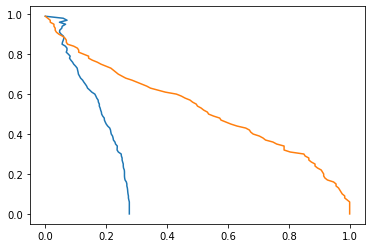

In [102]:
plt.plot(precision, t)
plt.plot(recall, t)
plt.show()

At which threshold precision and recall curves intersect?

* 0.2
* 0.4
* 0.6
* 0.8

## Question 4

Precision and recall are conflicting - when one grows, the other goes down. That's why they are often combined into the F1 score - a metrics that takes into account both

This is the formula for computing F1:

$$F_1 = 2 \cdot \cfrac{P \cdot R}{P + R}$$

Where $P$ is precision and $R$ is recall.

Let's compute F1 for all thresholds from 0.0 to 1.0 with increment 0.01

At which threshold F1 is maximal?

- 0.1
- 0.3
- 0.5
- 0.7

## Question 5


Use the `KFold` class from Scikit-Learn to evaluate our model on 5 different folds:

```
KFold(n_splits=5, shuffle=True, random_state=1)
```

* Iterate over different folds of `df_full_train`
* Split the data into train and validation
* Train the model on train with these parameters: `LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)`
* Use AUC to evaluate the model on validation


How large is standard devidation of the scores across different folds?

- 0.001
- 0.014
- 0.09
- 0.14

## Question 6

Now let's use 5-Fold cross-validation to find the best parameter C

* Iterate over the following C values: `[0.01, 0.1, 1, 10]`
* Initialize `KFold` with the same parameters as previously
* Use these parametes for the model: `LogisticRegression(solver='liblinear', C=C, max_iter=1000)`
* Compute the mean score as well as the std (round the mean and std to 3 decimal digits)

Which C leads to the best mean score?

- 0.01
- 0.1
- 1
- 10

If you have ties, select the score with the lowest std. If you still have ties, select the smallest C

## Submit the results

Submit your results here: https://forms.gle/e497sR5iB36mM9Cs5

It's possible that your answers won't match exactly. If it's the case, select the closest one.

## Deadline

The deadline for submitting is 04 October 2021, 17:00 CET. After that, the form will be closed.